In [2]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

class Layer :
    def __init__(self,dim) :
        self.weight = torch.ones(dim[0],dim[1]) 
        self.bias = torch.ones(dim[1])
        
    def activation(self,input) : #Sigmoid
        sigmoid = torch.sigmoid(input)
        return sigmoid

    def forward(self, input) :
        output=torch.matmul(self.weight, input)+self.bias
        return self.activation(output)
    
    def evaluate(self, pred, target) : #MSE
        loss = nn.MSELoss()
        output = loss(pred,target)
        return output

class Network:
    def __init__(self, batch_size = 2):
        self.batch_size = batch_size
        # network
        self.layer1 = Layer((2,2))

    def forward(self, x):
        x = self.layer1.forward(x)
        return x

    def single_processing(self, input, target) :
        pred = self.forward(input)
        print(self.layer1.evaluate(pred,target))

    #Create batch, then process each batch
    def batch_processing(self, input, target) :
        for i in range(0,len(input)-1,2):
            new_len=[input[i].tolist(),input[i+1].tolist()]
            new_ten=torch.Tensor(new_len)
            new_tar=[target[i].tolist(),target[i+1].tolist()]
            new_tar2=torch.Tensor(new_tar)
            self.single_processing(new_ten,new_tar2)

model = Network()
input = torch.Tensor([2,1])
target = torch.Tensor([5,5])
model.single_processing(input, target) #output: tensor(16.1442)
print("------------")

input = torch.Tensor([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
target = torch.Tensor([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6]])
model.batch_processing(input, target) 
#output:
#tensor(0.5005)
#tensor(6.5000)
#tensor(20.5000)

tensor(16.1442)
------------
tensor(0.5038)
tensor(6.5000)
tensor(20.5000)


In [5]:
trainset= MNIST('dataset_mnist',True, download= True)
trainset= MNIST('dataset_mnist',False, download= True)

In [6]:
trainset.data.shape

torch.Size([10000, 28, 28])

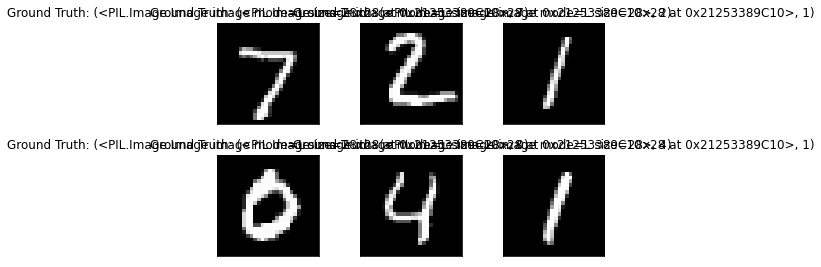

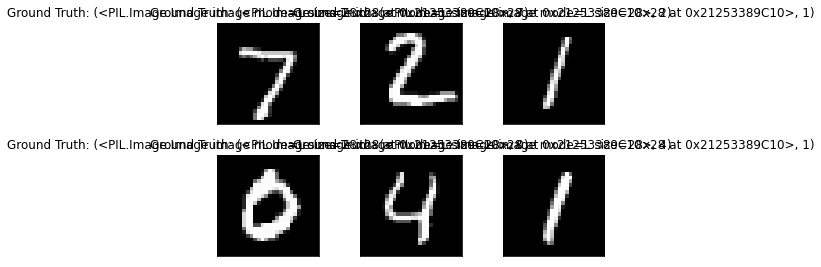

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(trainset[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(trainset[i]))
  plt.xticks([])
  plt.yticks([])
fig